In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [3]:
iris = pd.read_csv("Iris.csv")
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
label = LabelEncoder()
species_trans = label.fit_transform(iris['Species'])
iris['Species'] = species_trans
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = iris.drop(['Species'],axis=1)
Y = iris['Species']

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# Gradient Boosting

In [7]:

gradient = GradientBoostingClassifier(
    n_estimators=100,          
    learning_rate=0.1,         
    max_depth=3,               
    random_state=0             
)


gradient.fit(X_train, Y_train)


X_train_pred_gb = gradient.predict(X_train)
X_test_pred_gb = gradient.predict(X_test)

train_accuracy_gb = accuracy_score(Y_train, X_train_pred_gb)
test_accuracy_gb = accuracy_score(Y_test, X_test_pred_gb)

print(f"Gradient Boosting Train Accuracy: {train_accuracy_gb:}")
print(f"Gradient Boosting Test Accuracy: {test_accuracy_gb:}")


Gradient Boosting Train Accuracy: 1.0
Gradient Boosting Test Accuracy: 0.9666666666666667


In [8]:
print(classification_report(Y_train,X_train_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [9]:
print(classification_report(Y_test,X_test_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



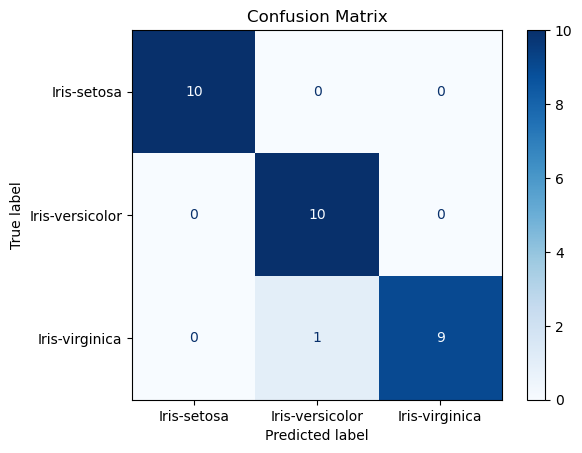

In [10]:
conf_mat = confusion_matrix(Y_test, X_test_pred_gb)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=label.classes_)
Matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning for Gradient Boosting

In [ ]:

param_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],          
    'min_samples_split': [2, 5,10]
}


In [12]:
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_grid=param_gb,
    cv=5,                       
    scoring='accuracy',
    n_jobs=-1           
)

grid_search_gb.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [13]:
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best Cross-Validation Accuracy for Gradient Boosting: {grid_search_gb.best_score_:}")


Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy for Gradient Boosting: 0.9583333333333334


In [14]:
best_gb = grid_search_gb.best_estimator_
X_test_pred_best_gb = best_gb.predict(X_test)
test_accuracy_best_gb = accuracy_score(Y_test, X_test_pred_best_gb)
print(f"Test Accuracy with Best Gradient Boosting Parameters: {test_accuracy_best_gb:}")


Test Accuracy with Best Gradient Boosting Parameters: 0.9666666666666667


In [15]:
print("Best Gradient Boosting Classification Report (Test Set):")
print(classification_report(Y_test, X_test_pred_best_gb, target_names=label.classes_))

Best Gradient Boosting Classification Report (Test Set):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



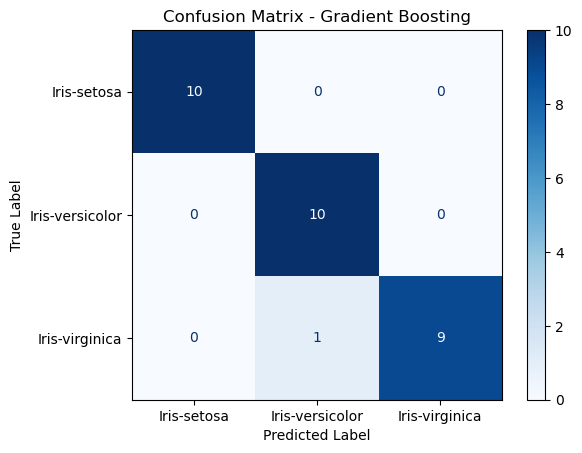

In [16]:

conf_mat_gb = confusion_matrix(Y_test, X_test_pred_best_gb)
Matrix_gb = ConfusionMatrixDisplay(confusion_matrix=conf_mat_gb, display_labels=label.classes_)
Matrix_gb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# XGBoost

In [ ]:
xgb = XGBClassifier(
    n_estimators=100,          
    learning_rate=0.1,         
    max_depth=3,               
    objective='multi:softprob',
    num_class=3,               
    use_label_encoder=False,   
    eval_metric='mlogloss',    
    random_state=0             
)

xgb.fit(X_train, Y_train)

X_train_pred_xgb = xgb.predict(X_train)
X_test_pred_xgb = xgb.predict(X_test)

train_accuracy_xgb = accuracy_score(Y_train, X_train_pred_xgb)
test_accuracy_xgb = accuracy_score(Y_test, X_test_pred_xgb)

print(f"XGBoost Train Accuracy: {train_accuracy_xgb:}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb:}")





XGBoost Train Accuracy: 1.0
XGBoost Test Accuracy: 0.9333333333333333


c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:17:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:

print("XGBoost Classification Report (Test Set):")
print(classification_report(Y_test, X_test_pred_xgb, target_names=label.classes_))


XGBoost Classification Report (Test Set):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



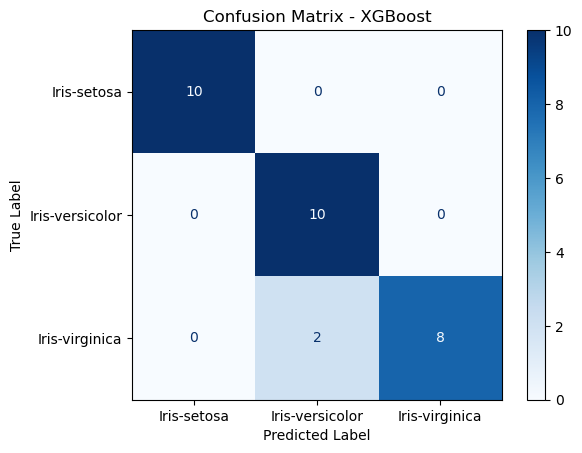

In [19]:

conf_mat_xgb = confusion_matrix(Y_test, X_test_pred_xgb)
Matrix_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_mat_xgb, display_labels=label.classes_)
Matrix_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Hyperparameter Tuning for XGBoost

In [20]:

param_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],   
    'gamma': [0, 0.1, 0.2],           
    'reg_alpha': [0, 0.1, 0.5],       
    'reg_lambda': [1, 1.5, 2]         
}


In [21]:

xgb_clf_grid = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)


grid_search_xgb = GridSearchCV(
    estimator=xgb_clf_grid,
    param_grid=param_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


grid_search_xgb.fit(X_train, Y_train)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [22]:
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy for XGBoost: {grid_search_xgb.best_score_:.4f}")

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best Cross-Validation Accuracy for XGBoost: 0.9417


In [23]:
best_xgb = grid_search_xgb.best_estimator_
X_test_pred_best_xgb = best_xgb.predict(X_test)
test_accuracy_best_xgb = accuracy_score(Y_test, X_test_pred_best_xgb)
print(f"Test Accuracy with Best XGBoost Parameters: {test_accuracy_best_xgb:.4f}")


Test Accuracy with Best XGBoost Parameters: 0.9333


In [24]:
print("\Best XGBoost Classification Report (Test Set):")
print(classification_report(Y_test, X_test_pred_best_xgb, target_names=label.classes_))

\Best XGBoost Classification Report (Test Set):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



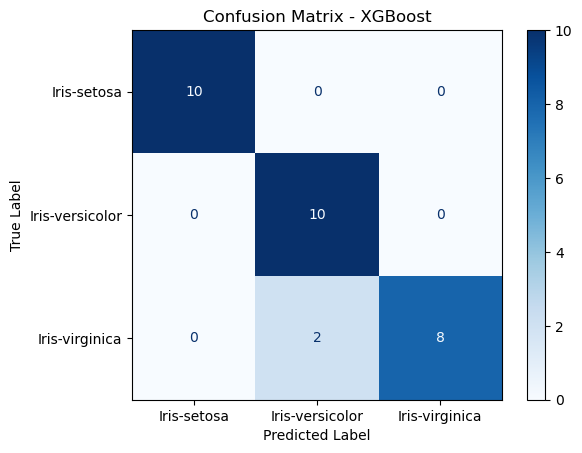

In [25]:

conf_mat_xgb = confusion_matrix(Y_test, X_test_pred_best_xgb)
Matrix_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_mat_xgb, display_labels=label.classes_)
Matrix_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
